In [1]:
import numpy as np
import pandas as pd
import pyreadr as pyreadr

import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

In [2]:
res = {}
for i in range(1,9):
    aux = np.load('saved_results_'+str(i)+'.npz')
    if(i == 1):
        res['intercette'] = aux['intercette']
        res['coefficienti'] = aux['coefficienti']
    else:
        res['intercette'] = np.concatenate([res['intercette'], aux['intercette']])
        res['coefficienti'] = np.concatenate([res['coefficienti'], aux['coefficienti']])
        


In [3]:
print(res['intercette'].shape)
print(res['coefficienti'].shape)

(1000,)
(1000, 53)


In [4]:
df = pyreadr.read_r('dataset.Rdata')['data']

In [5]:
df.drop(columns=['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START'],inplace=True)

In [6]:
lista = df['OCCUPATION_TYPE'].unique().to_list()
for x in ['NaN', 'Drivers', 'Laborers', 'Sales staff']:
    lista.remove(x)

df.replace(to_replace = lista, value='BASE_OCC', inplace=True)

In [7]:
lista = df['ORGANIZATION_TYPE'].unique().to_list()
for x in ['XNA', 'Business Entity Type 3', 'Self-employed']:
    lista.remove(x)

df.replace(to_replace = lista, value='BASE_ORG', inplace=True)

In [8]:
lista_variabili_numeriche = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_TOTAL']
lista_variabili_categoriche = ['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_TYPE_SUITE', 'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE', 'NAME_EDUCATION_TYPE']
lista_variabili_da_tenere = ['TARGET'] + lista_variabili_categoriche + lista_variabili_numeriche

df = df.loc[:, lista_variabili_da_tenere]


In [9]:
for col_name in lista_variabili_categoriche:
    aux = pd.get_dummies(df[col_name], col_name)
    aux.drop(columns=aux.columns[0], inplace=True)
    df = pd.concat([df, aux], axis=1)
    df.drop(columns=col_name, inplace=True)

In [10]:
for col in df.columns:
    if (len(df[col].unique()) == 2):
        df[col] = df[col].to_numpy().astype(np.int32)
    else:
        df[col] = df[col].to_numpy().astype(np.float32)
        

In [11]:
dizionario_trasformazioni = {}
for col in lista_variabili_numeriche:
    dizionario_trasformazioni[col] = {'media': np.mean(df[col]), 'std': np.std(df[col])}
    df[col] = (df[col] - dizionario_trasformazioni[col]['media'])/(dizionario_trasformazioni[col]['std'])

In [12]:
indici_colonne = df.columns.values[df.columns != 'TARGET'].tolist()

In [13]:
indici_colonne

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_TOTAL',
 'OWN_CAR_AGE_10-15',
 'OWN_CAR_AGE_15-20',
 'OWN_CAR_AGE_20-25',
 'OWN_CAR_AGE_25-30',
 'OWN_CAR_AGE_5-10',
 'OWN_CAR_AGE_>=30',
 'OWN_CAR_AGE_NaN',
 'OCCUPATION_TYPE_Drivers',
 'OCCUPATION_TYPE_Laborers',
 'OCCUPATION_TYPE_NaN',
 'OCCUPATION_TYPE_Sales staff',
 'NAME_FAMILY_STATUS_Married',
 'NAME_FAMILY_STATUS_Separated',
 'NAME_FAMILY_STATUS_Single / not married',
 'NAME_FAMILY_STATUS_Widow',
 'NAME_TYPE_SUITE_Family',
 'NAME_TYPE_SUITE_Group of people',
 'NAME_TYPE_SUITE_Other_A',
 'NAME_TYPE_SUITE_Other_B',
 'NAME_TYPE_SUITE

In [14]:
df_saved_results = pd.DataFrame()
i = 0
for col in indici_colonne:
    df_saved_results[col] = res['coefficienti'][:,i]
    i += 1
    
df_saved_results

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,ORGANIZATION_TYPE_BASE_ORG,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_XNA,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special
0,-0.029828,0.037844,1.103218,0.187635,-1.187549,0.005816,-0.176911,-0.671930,-0.070687,-0.095923,...,-0.212383,0.132486,0.033732,-0.156228,0.000000,-1.892702,-0.129393,0.000000,0.401829,0.255299
1,0.011184,0.031034,1.254765,0.172400,-1.356896,0.023377,-0.175709,-0.648236,-0.049400,-0.087058,...,-0.259844,0.089209,0.011798,-0.145379,0.008022,-1.856592,-0.116042,0.092295,0.445597,0.302484
2,0.000000,0.012392,1.172741,0.164408,-1.264408,0.000760,-0.176127,-0.675426,-0.062640,-0.093758,...,-0.012402,0.090398,0.006098,-0.124990,0.031740,-1.863659,-0.111019,0.000000,0.432722,0.223319
3,-0.033820,0.024078,1.167772,0.193981,-1.270609,0.009952,-0.181064,-0.627407,-0.060537,-0.091860,...,-0.282047,0.055306,0.000000,-0.115289,0.023651,-1.698095,-0.324842,-0.089480,0.223212,0.092757
4,0.000000,0.028238,1.096846,0.185269,-1.200546,0.017177,-0.155364,-0.595430,-0.032915,-0.089951,...,-0.240537,0.172309,0.003052,-0.114394,0.071596,-1.749425,-0.113895,0.037660,0.536042,0.301661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.033598,1.239657,0.205977,-1.353801,0.025559,-0.147854,-0.092330,-0.071129,-0.103923,...,-0.327859,-0.057005,-0.084145,-0.126451,0.034632,-0.410304,-0.483100,-0.357779,0.111947,-0.083607
996,0.000000,0.021422,1.181318,0.182148,-1.265311,-0.001674,-0.169438,-0.614920,-0.060208,-0.091828,...,-0.297882,0.195613,0.108825,-0.078049,0.022443,-1.674390,-0.168626,0.000000,0.472789,0.245559
997,0.007529,0.029892,1.044596,0.177619,-1.132715,0.016430,-0.165905,-0.671104,-0.047862,-0.088719,...,-0.268000,0.060347,0.022969,-0.132167,0.000000,-1.918525,-0.139329,0.000000,0.447037,0.248579
998,0.000000,0.031754,1.128587,0.196005,-1.238207,-0.001731,-0.194610,-0.695712,-0.054792,-0.100334,...,-0.142041,0.115273,0.033801,-0.092071,0.066903,-1.891897,-0.153344,-0.077754,0.358499,0.253933


In [15]:
df_risultati = pd.DataFrame()

In [16]:
aux = res['intercette']
name = 'intercetta'

df_risultati['name'] = [name]
df_risultati['mean'] = [np.mean(aux)]
df_risultati['std'] = [np.std(aux)]
df_risultati['25%'] = [np.percentile(aux,25)]
df_risultati['75%'] = [np.percentile(aux,75)]
hdi_interval = az.hdi(aux, hdi_prob=0.95)
df_risultati['HDI_95_Left'] = hdi_interval[0]
df_risultati['HDI_95_Right'] = hdi_interval[1]
df_risultati['p_value'] = [min(np.sum(aux < 0), np.sum(aux > 0))/len(aux)]
df_risultati

,name,mean,std,25%,75%,HDI_95_Left,HDI_95_Right,p_value
0,intercetta,-1.454513,0.13859,-1.555403,-1.35342,-1.698341,-1.178962,0.0


In [17]:
for i in range(res['coefficienti'].shape[1]):
    aux = res['coefficienti'][:,i]
    name = indici_colonne[i]
    hdi_interval = az.hdi(aux, hdi_prob=0.95)

    new_row = {
        'name': [name],
        'mean': [np.mean(aux)],
        'std': [np.std(aux)],
        '25%': [np.percentile(aux,25)],
        '75%': [np.percentile(aux,75)],
        'HDI_95_Left': [hdi_interval[0]],
        'HDI_95_Right': [hdi_interval[1]],
        'p_value': [(2*min(np.sum(aux < 0), np.sum(aux > 0)) + np.sum(aux == 0))/len(aux)]
    }
    
    df_risultati = pd.concat([df_risultati, pd.DataFrame(data=new_row)])

df_risultati.set_index('name', inplace=True)

In [18]:
df_risultati

,mean,std,25%,75%,HDI_95_Left,HDI_95_Right,p_value
name,,,,,,,
intercetta,-1.454513,0.138590,-1.555403,-1.353420,-1.698341,-1.178962,0.000
CNT_CHILDREN,-0.008961,0.016822,-0.016833,0.000000,-0.048878,0.017339,0.590
AMT_INCOME_TOTAL,0.025322,0.010470,0.018355,0.032137,0.004920,0.045219,0.012
AMT_CREDIT,1.168723,0.055500,1.132849,1.204826,1.064610,1.279535,0.000
AMT_ANNUITY,0.180678,0.015471,0.170519,0.191481,0.151551,0.210329,0.000
AMT_GOODS_PRICE,-1.262489,0.055878,-1.298467,-1.225292,-1.378041,-1.157855,0.000
REGION_POPULATION_RELATIVE,0.010914,0.010258,0.003379,0.017640,-0.007485,0.031266,0.309
DAYS_BIRTH,-0.172855,0.012024,-0.180915,-0.164651,-0.196962,-0.151105,0.000
DAYS_EMPLOYED,-0.524813,0.214961,-0.658428,-0.553148,-0.717446,-0.085198,0.000


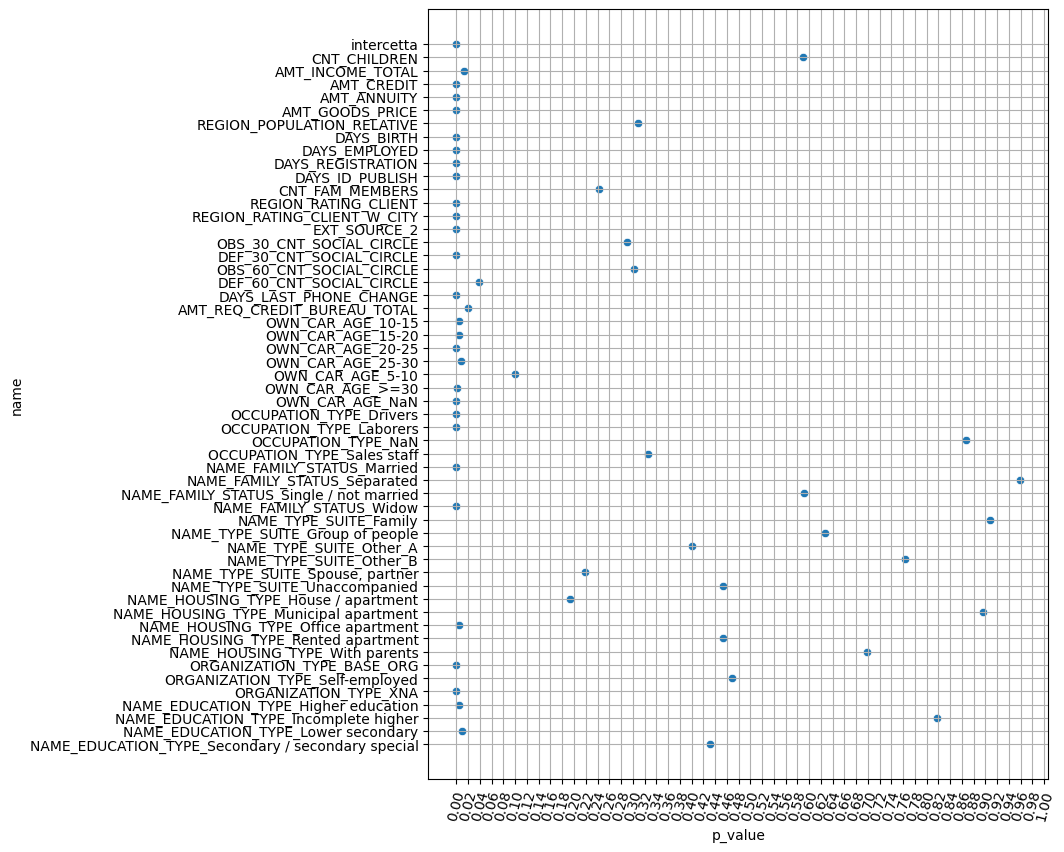

In [27]:
plt.figure(figsize=(8,10))
ax = plt.subplot(1,1,1)
sax = sns.scatterplot(df_risultati, y='name', x='p_value')
ticks = ax.set_xticks(np.linspace(0.0,1.0,51))
ticks = plt.xticks(rotation=75)
plt.grid()

<AxesSubplot: >

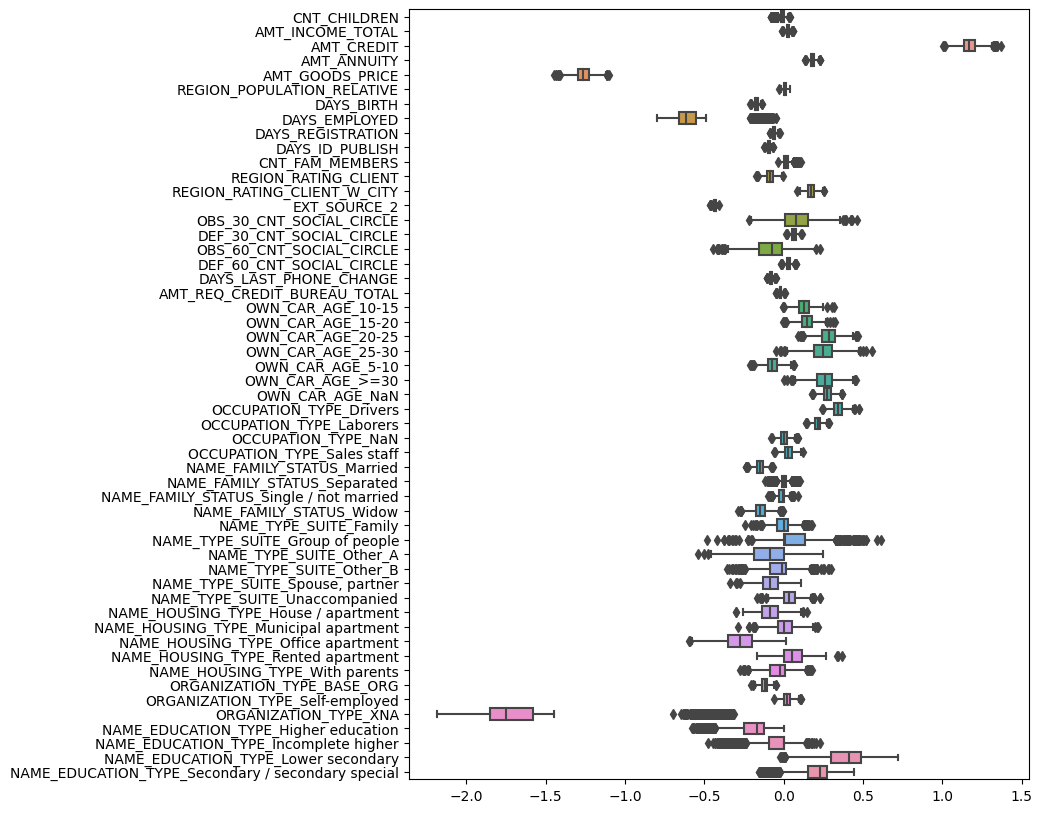

In [28]:
plt.figure(figsize=(8,10))
sns.boxplot(df_saved_results, orient='h')

In [21]:
np.sum(res['coefficienti']==0)

2890

<AxesSubplot: xlabel='REGION_POPULATION_RELATIVE', ylabel='Density'>

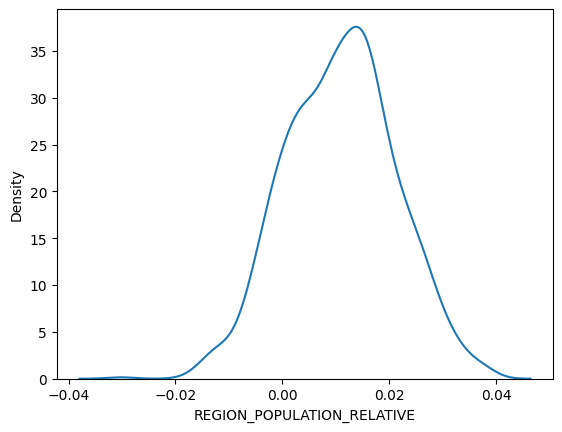

In [22]:
sns.kdeplot(df_saved_results['REGION_POPULATION_RELATIVE'])